In [1]:
if 'google.colab' in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes
    data_location = "https://raw.githubusercontent.com/ourownstory/neural_prophet/master/"
else:
    data_location = "../"

In [2]:
from collections import namedtuple
import pandas as pd
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet
from neuralprophet.utils.utils import set_log_level
set_log_level("ERROR")

In [3]:
Experiment = namedtuple('Experiment', ['data', 'freq', 'model_config'])
experiments = [
    Experiment(
        data="air_passengers.csv",
        freq="MS",
        model_config={"seasonality_mode":"multiplicative"},
    ),
    Experiment(
        data="wp_log_peyton_manning.csv",
        freq="D",
        model_config={"n_changepoints": 50},
    ),
    Experiment(
        data="yosemite_temps.csv",
        freq="5min",
        model_config={"n_forecasts": 12, "n_lags": 36},
    ),
]

In [4]:
def run_experiment(e, plot=False):
    df = pd.read_csv(data_location + "example_data/" + e.data)
    print(" ---- running exp: {} (len: {}) ----".format(e.data, len(df)))
    folds = NeuralProphet(**e.model_config).crossvalidation_split_df(df, freq=e.freq, k=3, fold_pct=0.2, fold_overlap_pct=0.0)
    train, val = [], []
    for df_train, df_val in folds:
        m = NeuralProphet(**e.model_config)
        metrics_train = m.fit(df_train, freq=e.freq, plot_live_loss=False)
        metrics_val = m.test(df_val)
        train.append(metrics_train["MAE"].values[-1])
        val.append(metrics_val["MAE"].values[-1])
    if plot:
        future = m.make_future_dataframe(df_train, periods=len(df_val), n_historic_predictions=len(df_train))
        forecast = m.predict(future)
        fig = m.plot(forecast)
        plt.show()
    print("train MAE:", train)
    print("val MAE:", val)
    print("train MAE (avg):", sum(train)/len(train))
    print("val MAE (avg):", sum(val)/len(val))
    

  0%|          | 0/192 [00:00<?, ?it/s]

 ---- running exp: air_passengers.csv (len: 144) ----


  0%|                                                                                          | 0/400 [00:00<?, ?it/s]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
WARNING - (py.warnings._showwarnmsg) - D:\ProgramData\anaconda3\envs\np2\lib\site-packages\pytorch_lightning\utilities\distributed.py:68: UserWarning: you defined a validation_step but have no val_dataloader. Skipping validation loop
  warnings.warn(*args, **kwargs)


  | Name          | Type          | Params
------------------------------------------------
0 | season_params | ParameterDict | 12    
1 | loss_func     | SmoothL1Loss  | 0     
------------------------------------------------
25        Trainable params
0         Non-trainable params
25        Total params
0.000     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

  0%|          | 0/199 [00:00<?, ?it/s]


  0%|                                                                                          | 0/400 [00:00<?, ?it/s]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
WARNING - (py.warnings._showwarnmsg) - D:\ProgramData\anaconda3\envs\np2\lib\site-packages\pytorch_lightning\utilities\distributed.py:68: UserWarning: you defined a validation_step but have no val_dataloader. Skipping validation loop
  warnings.warn(*args, **kwargs)


  | Name          | Type          | Params
------------------------------------------------
0 | season_params | ParameterDict | 12    
1 | loss_func     | SmoothL1Loss  | 0     
------------------------------------------------
25        Trainable params
0         Non-trainable params
25        Total params
0.000     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

  0%|          | 0/205 [00:00<?, ?it/s]



  0%|                                                                                          | 0/348 [00:00<?, ?it/s]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
WARNING - (py.warnings._showwarnmsg) - D:\ProgramData\anaconda3\envs\np2\lib\site-packages\pytorch_lightning\utilities\distributed.py:68: UserWarning: you defined a validation_step but have no val_dataloader. Skipping validation loop
  warnings.warn(*args, **kwargs)


  | Name          | Type          | Params
------------------------------------------------
0 | season_params | ParameterDict | 12    
1 | loss_func     | SmoothL1Loss  | 0     
------------------------------------------------
25        Trainable params
0         Non-trainable params
25        Total params
0.000     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

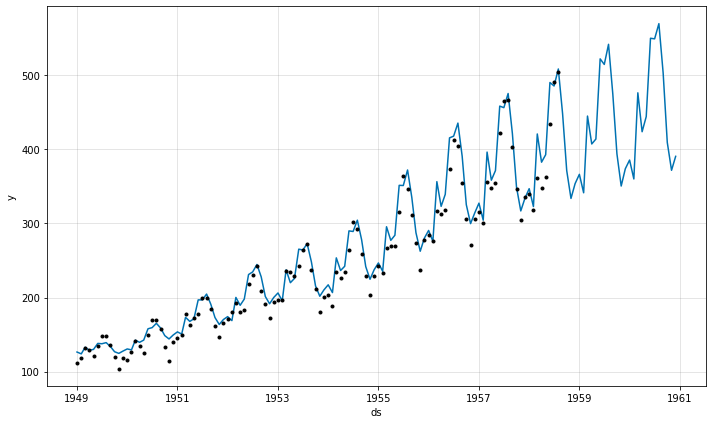

  0%|          | 0/253 [00:00<?, ?it/s]

train MAE: [40.74635009765625, 6.18671365217729, 18.689562435807854]
val MAE: [113.77344512939453, 32.40293502807617, 26.86402702331543]
train MAE (avg): 21.87420872854713
val MAE (avg): 57.68013572692871
 ---- running exp: wp_log_peyton_manning.csv (len: 2905) ----


                                                                                                                       
                                                                                                                       

  0%|                                                                                          | 0/115 [00:00<?, ?it/s]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
WARNING - (py.warnings._showwarnmsg) - D:\ProgramData\anaconda3\envs\np2\lib\site-packages\pytorch_lightning\utilities\distributed.py:68: UserWarning: you defined a validation_step but have no val_dataloader. Skipping validation loop
  warnings.warn(*args, **kwargs)


  | Name          | Type          | Params
------------------------------------------------
0 | season_params | ParameterDict | 18    
1 | loss_func     | SmoothL1Loss  | 0     
------------------------------------------------
71        Trainable params
0         Non-trainable params
71        T

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

  0%|          | 0/262 [00:00<?, ?it/s]

  0%|                                                                                          | 0/103 [00:00<?, ?it/s]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
WARNING - (py.warnings._showwarnmsg) - D:\ProgramData\anaconda3\envs\np2\lib\site-packages\pytorch_lightning\utilities\distributed.py:68: UserWarning: you defined a validation_step but have no val_dataloader. Skipping validation loop
  warnings.warn(*args, **kwargs)


  | Name          | Type          | Params
------------------------------------------------
0 | season_params | ParameterDict | 18    
1 | loss_func     | SmoothL1Loss  | 0     
------------------------------------------------
71        Trainable params
0         Non-trainable params
71        Total params
0.000     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

  0%|          | 0/268 [00:00<?, ?it/s]

  0%|                                                                                           | 0/96 [00:00<?, ?it/s]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
WARNING - (py.warnings._showwarnmsg) - D:\ProgramData\anaconda3\envs\np2\lib\site-packages\pytorch_lightning\utilities\distributed.py:68: UserWarning: you defined a validation_step but have no val_dataloader. Skipping validation loop
  warnings.warn(*args, **kwargs)


  | Name          | Type          | Params
------------------------------------------------
0 | season_params | ParameterDict | 18    
1 | loss_func     | SmoothL1Loss  | 0     
------------------------------------------------
71        Trainable params
0         Non-trainable params
71        Total params
0.000     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

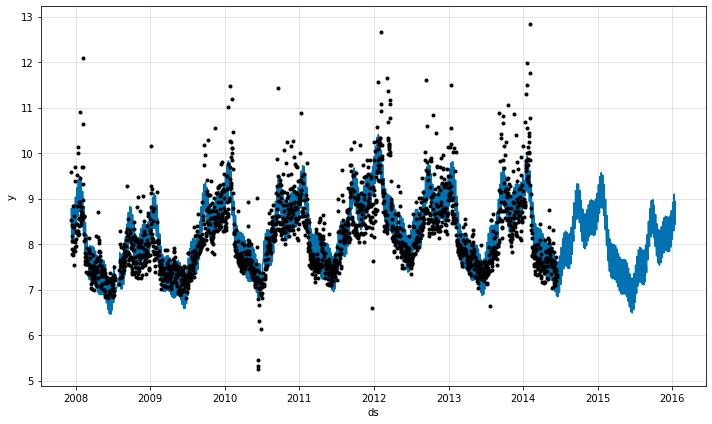

train MAE: [0.31945563752762013, 0.34210177195940766, 0.36476293555020056]
val MAE: [2.040250062942505, 0.4574039876461029, 0.3540892004966736]
train MAE (avg): 0.3421067816790761
val MAE (avg): 0.9505810836950938
 ---- running exp: yosemite_temps.csv (len: 18721) ----


  0%|          | 0/293 [00:00<?, ?it/s]

  0%|                                                                                           | 0/75 [00:00<?, ?it/s]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
WARNING - (py.warnings._showwarnmsg) - D:\ProgramData\anaconda3\envs\np2\lib\site-packages\pytorch_lightning\utilities\distributed.py:68: UserWarning: you defined a validation_step but have no val_dataloader. Skipping validation loop
  warnings.warn(*args, **kwargs)


  | Name          | Type          | Params
------------------------------------------------
0 | season_params | ParameterDict | 18    
1 | ar_net        | ModuleList    | 432   
2 | loss_func     | SmoothL1Loss  | 0     
------------------------------------------------
463       Trainable params
0         Non-trainable params
463       Total params
0.002     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

  0%|          | 0/302 [00:00<?, ?it/s]

  0%|                                                                                           | 0/69 [00:00<?, ?it/s]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
WARNING - (py.warnings._showwarnmsg) - D:\ProgramData\anaconda3\envs\np2\lib\site-packages\pytorch_lightning\utilities\distributed.py:68: UserWarning: you defined a validation_step but have no val_dataloader. Skipping validation loop
  warnings.warn(*args, **kwargs)


  | Name          | Type          | Params
------------------------------------------------
0 | season_params | ParameterDict | 18    
1 | ar_net        | ModuleList    | 432   
2 | loss_func     | SmoothL1Loss  | 0     
------------------------------------------------
463       Trainable params
0         Non-trainable params
463       Total params
0.002     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

  0%|          | 0/308 [00:00<?, ?it/s]

  0%|                                                                                           | 0/66 [00:00<?, ?it/s]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
WARNING - (py.warnings._showwarnmsg) - D:\ProgramData\anaconda3\envs\np2\lib\site-packages\pytorch_lightning\utilities\distributed.py:68: UserWarning: you defined a validation_step but have no val_dataloader. Skipping validation loop
  warnings.warn(*args, **kwargs)


  | Name          | Type          | Params
------------------------------------------------
0 | season_params | ParameterDict | 18    
1 | ar_net        | ModuleList    | 432   
2 | loss_func     | SmoothL1Loss  | 0     
------------------------------------------------
463       Trainable params
0         Non-trainable params
463       Total params
0.002     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

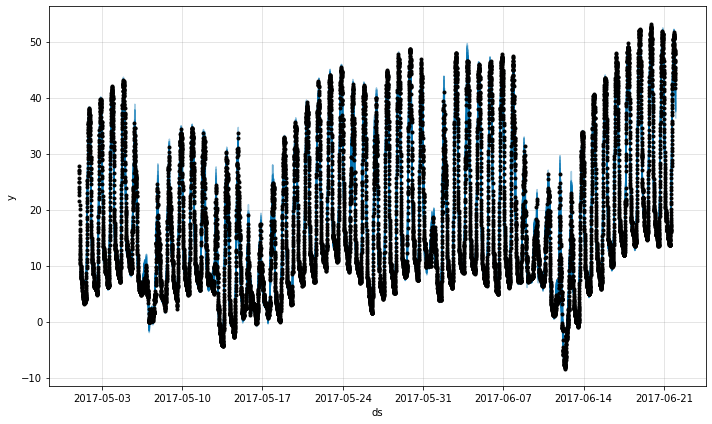

train MAE: [1.0741637702350302, 1.084318506610171, 1.062081856311154]
val MAE: [2.563774402501882, 1.4678671549115279, 2.1323898559214602]
train MAE (avg): 1.073521377718785
val MAE (avg): 2.05467713777829


In [5]:
for exp in experiments:
    run_experiment(exp, plot=True)